In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv(r"A:\Personal\AI\boston\BostonHousing.csv")

In [4]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


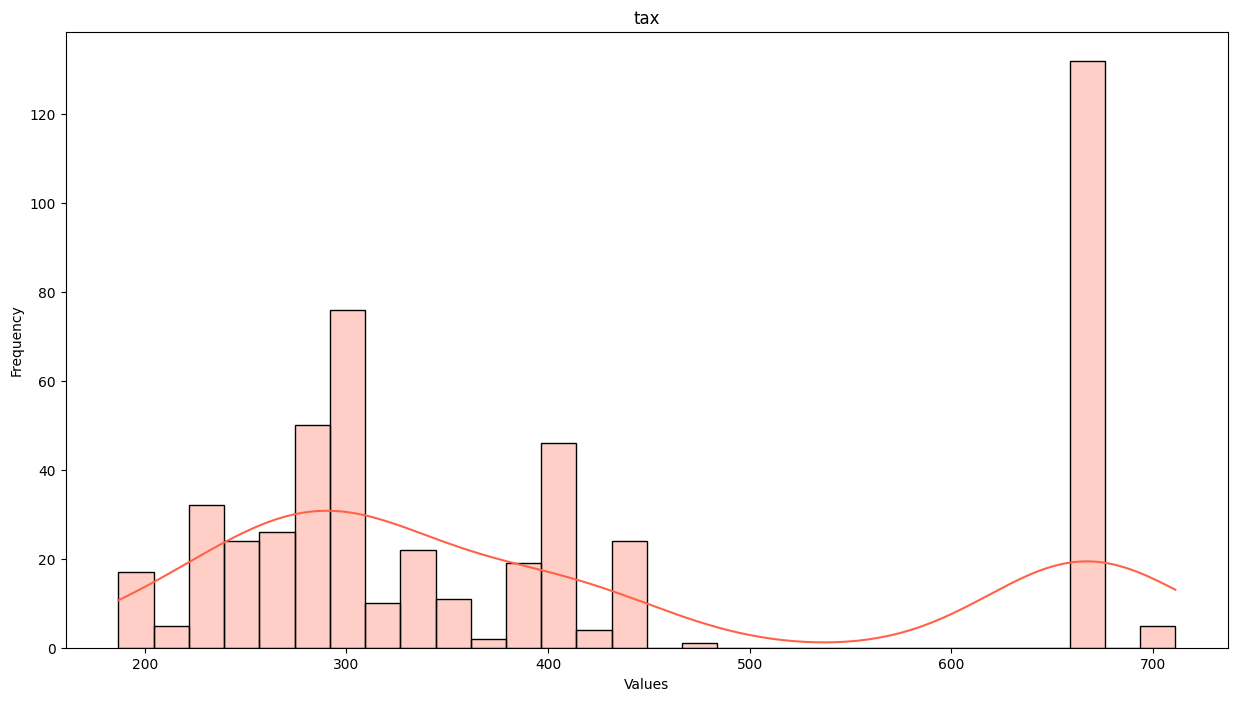

In [5]:
fig_size = (15, 8)
bar_colors = "tomato"

fig_tax , ax_tax = plt.subplots(figsize=fig_size)
sns.histplot(df.tax, bins=30, kde=True, color=bar_colors, alpha = 0.3)
ax_tax.set_ylabel('Frequency')
ax_tax.set_xlabel('Values')
ax_tax.set_title('tax')
plt.show()

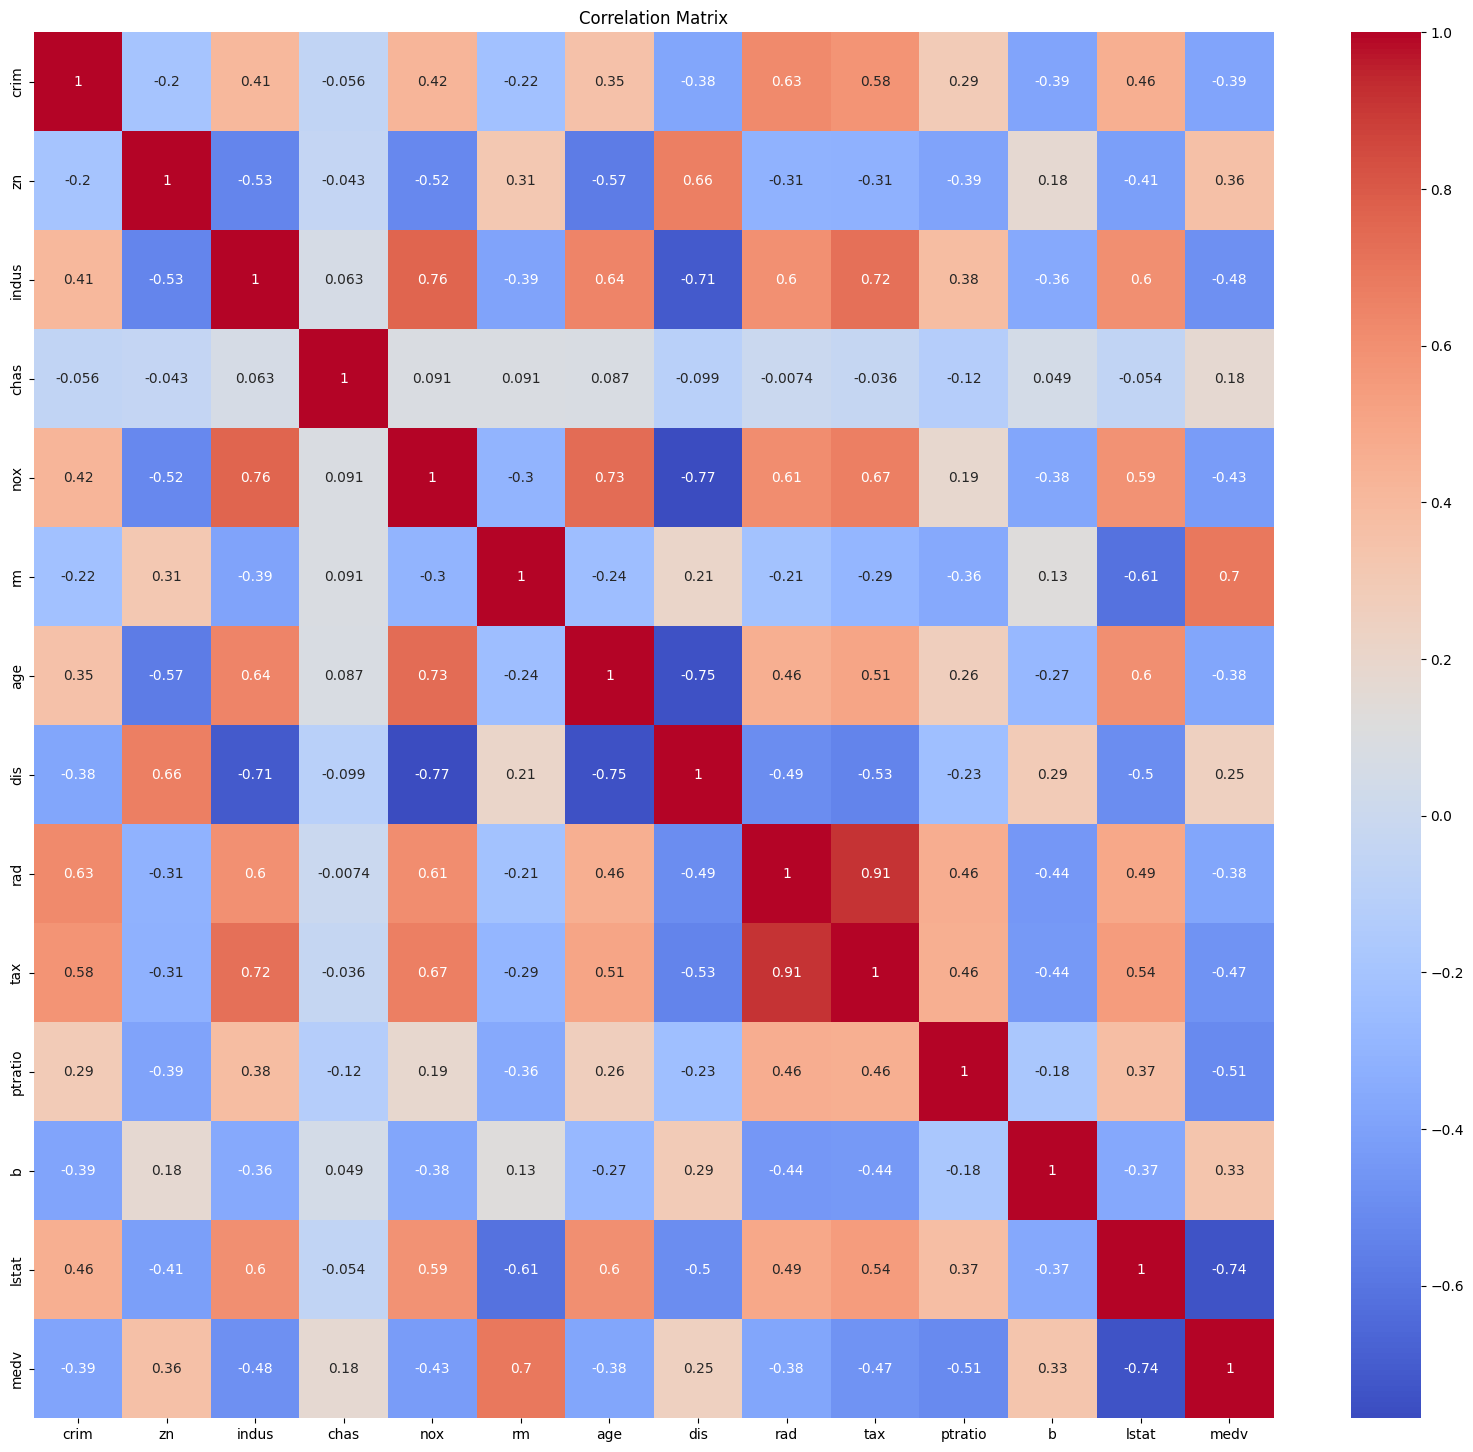

In [6]:
fig_size = (20,18)
fig_corr , ax_corr = plt.subplots(figsize=fig_size)
ax_corr.set_title('Correlation Matrix')
sns.heatmap(df.corr(), ax = ax_corr, cmap = "coolwarm", annot = True, xticklabels=True, yticklabels=True )
plt.show()

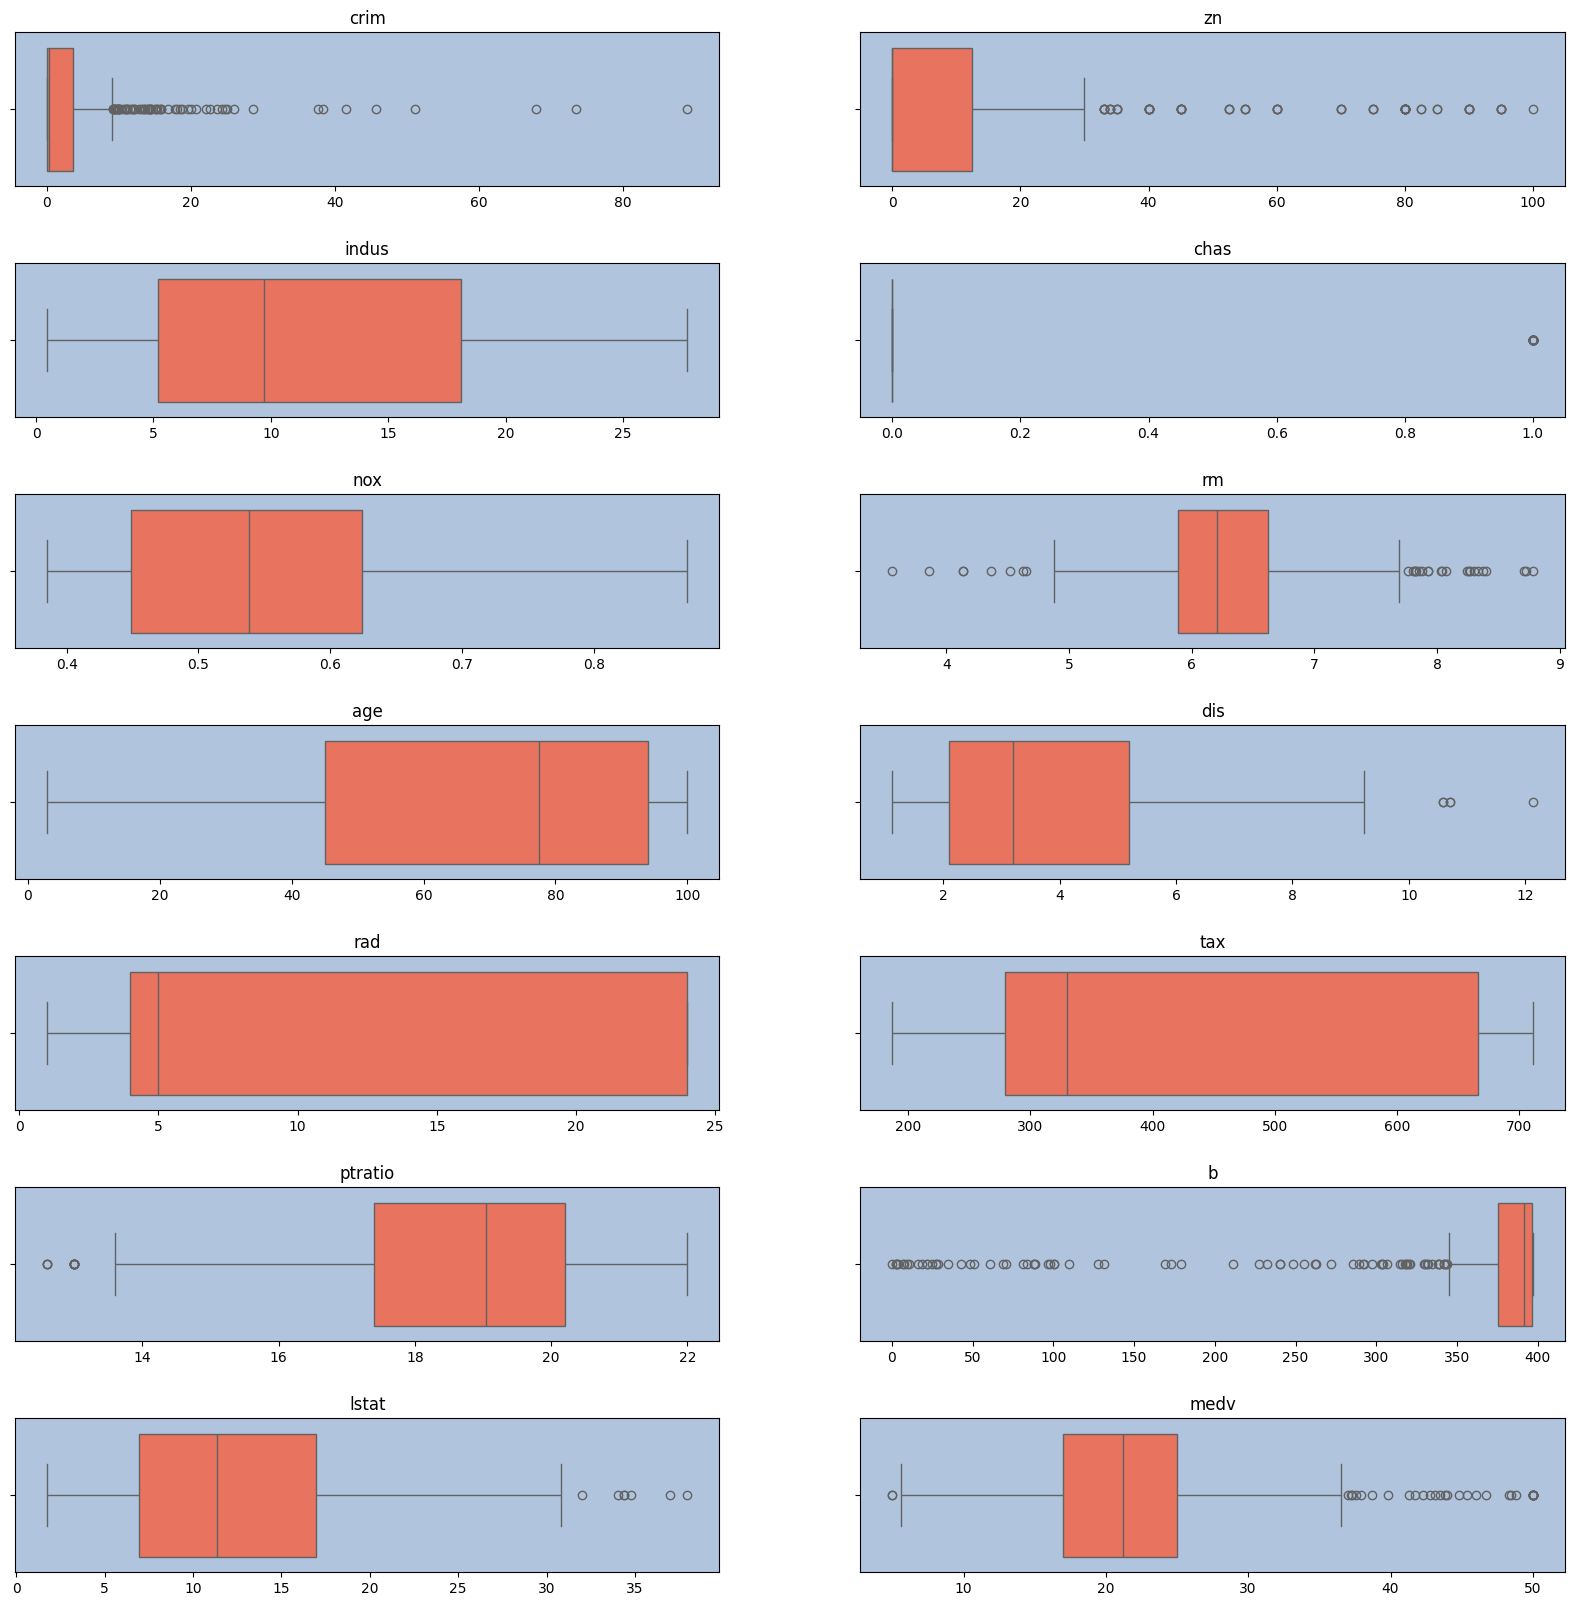

In [7]:
fig_size = (20,20)
bg_color = "lightsteelblue"
fig, axs = plt.subplots(7, 2, figsize=fig_size, gridspec_kw = {"hspace": 0.5})

for i in range(7):
    for j in range(2):
        sns.boxplot(data=df.iloc[:, 2*i+j], ax = axs[i][j], orient = "h", color="tomato")
        axs[i][j].set_facecolor(bg_color)
        axs[i][j].set_title(df.iloc[:, 2*i+j].name)
        axs[i][j].set_xlabel("")

In [8]:
df_rep = df.copy()

for col in df_rep.columns:
    if col == "chas":
        continue

    col_dtype = df[col].dtype
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - IQR*1.5
    up_limit = Q3 + IQR*1.5
    if col_dtype == "int":
        low_limit = int(low_limit)
        up_limit = int(up_limit)
    df_rep.loc[df_rep[col] > Q3 + IQR*1.5, col] = up_limit
    df_rep.loc[(df_rep[col] < Q1 - IQR*1.5), col] =  low_limit

C:\Users\arian\AppData\Local\Temp\ipykernel_13084\615053067.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1246.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_rep.loc[df_rep[col] > Q3 + IQR*1.5, col] = up_limit


In [9]:
df_rep.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2.225032,6.963439,11.136779,0.069170,0.554695,6.275312,68.574901,3.783947,9.549407,408.237154,18.463834,381.918836,12.612011,21.877075
std,3.313353,12.028788,6.860353,0.253994,0.115878,0.630242,28.148861,2.069765,8.707259,168.537116,2.143924,19.054913,7.016829,7.602976
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.778500,2.900000,1.129600,1.000000,187.000000,13.200000,344.106250,1.730000,5.062500
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,9.069639,31.250000,27.740000,1.000000,0.871000,7.730500,100.000000,9.820800,24.000000,711.000000,22.000000,396.900000,31.962500,36.962500


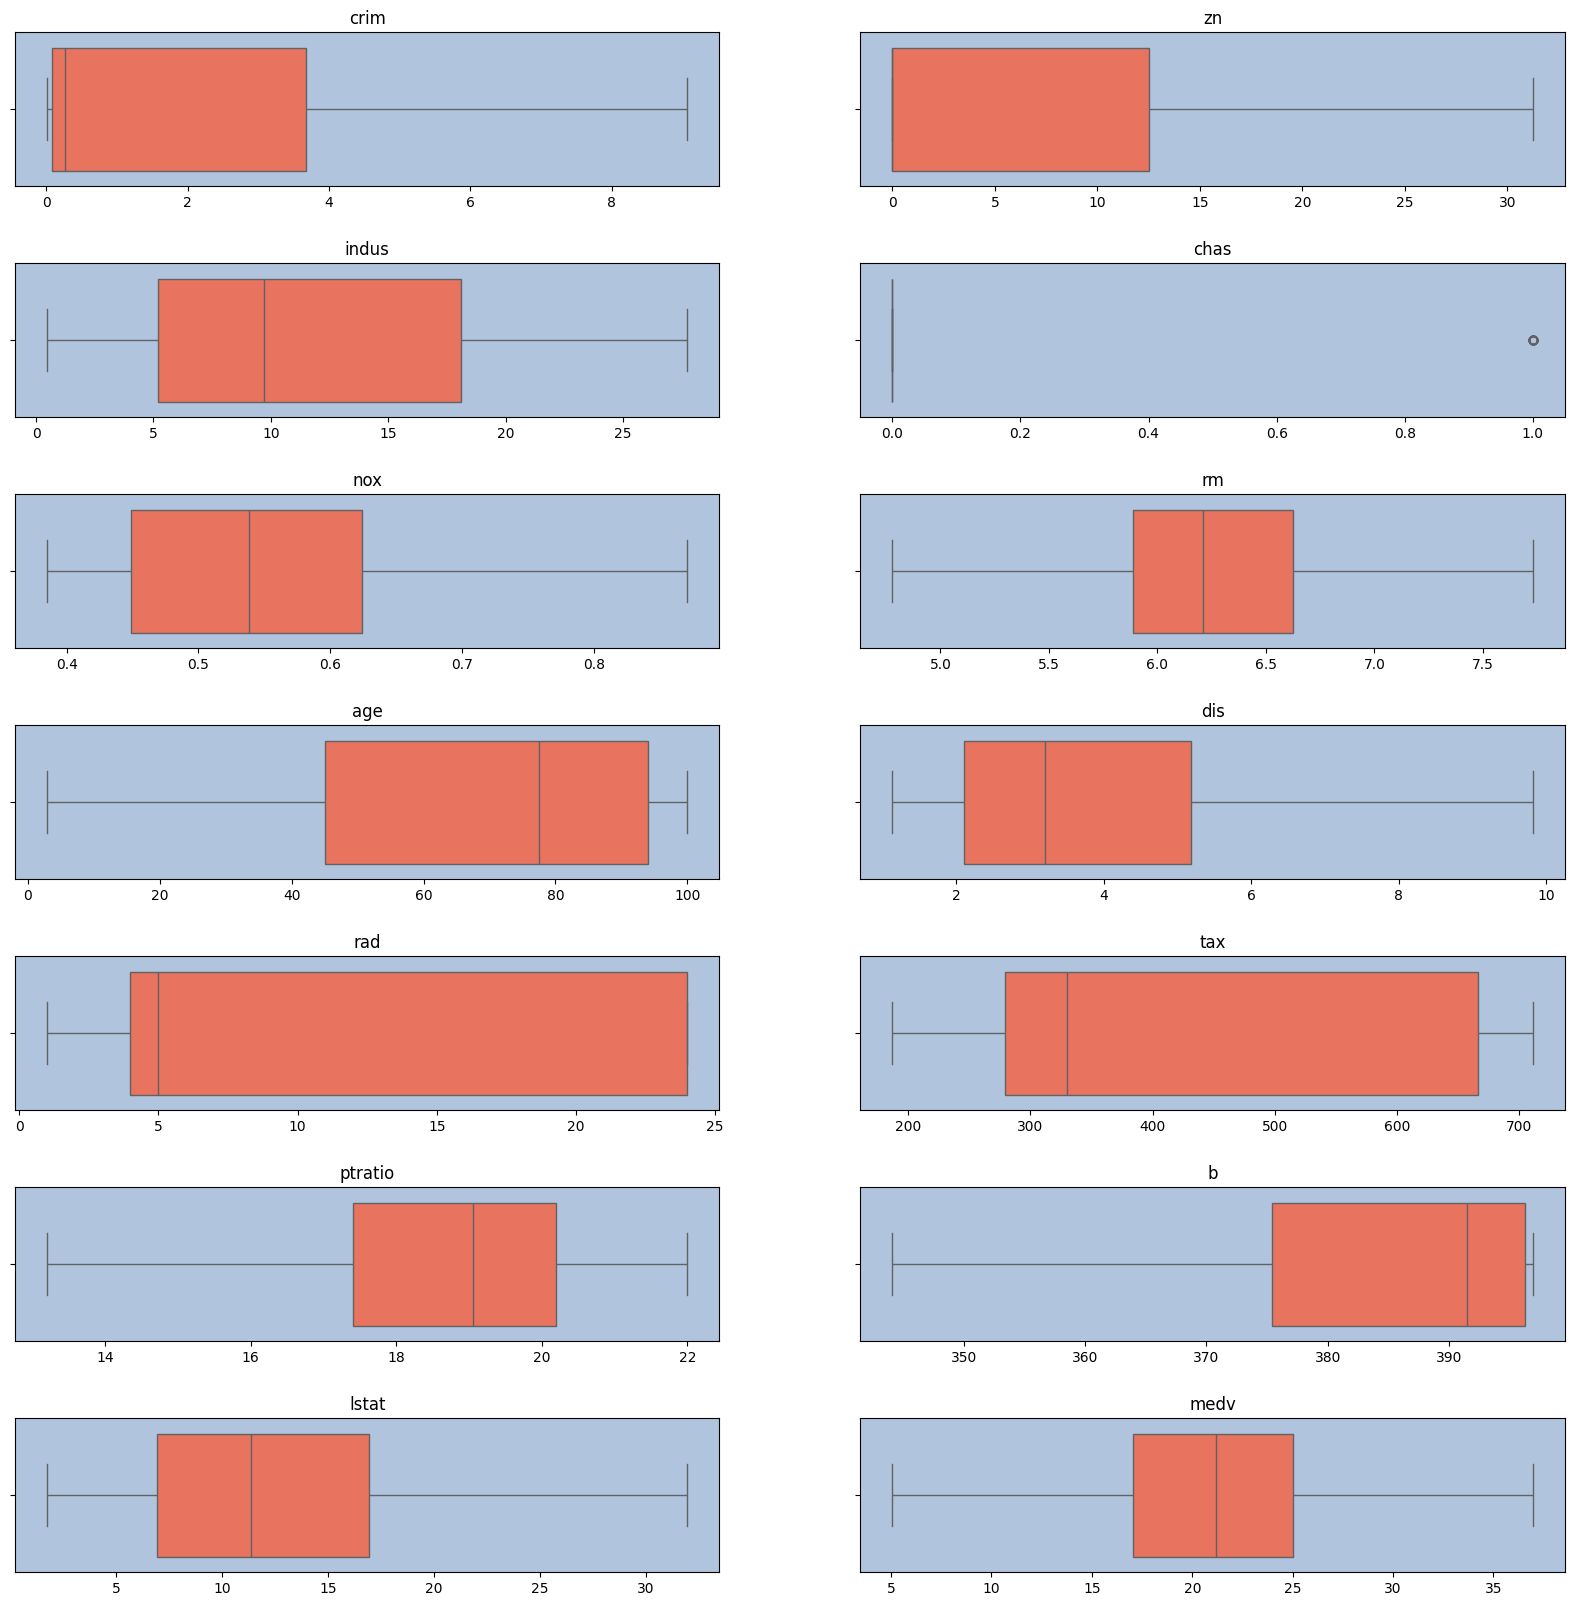

In [10]:
fig_size = (20,20)
bg_color = "lightsteelblue"
fig, axs = plt.subplots(7, 2, figsize=fig_size, gridspec_kw = {"hspace": 0.5})

for i in range(7):
    for j in range(2):
        sns.boxplot(data=df_rep.iloc[:, 2*i+j], ax = axs[i][j], orient = "h", color="tomato")
        axs[i][j].set_facecolor(bg_color)
        axs[i][j].set_title(df_rep.iloc[:, 2*i+j].name)
        axs[i][j].set_xlabel("")

In [11]:
df_zscore = df.loc[(abs((df.dis - df.dis.mean())/df.dis.std(ddof=0)) <= 3)].copy()

In [12]:
IQR = df.dis.quantile(0.75) - df.dis.quantile(0.25)
low_limit =  df.dis.quantile(0.25) - IQR*1.5
up_limit = df.dis.quantile(0.75) + IQR*1.5
df_iqr = df.loc[(low_limit <= df.dis) & (df.dis <= up_limit)].copy()

In [13]:
var_difference = df_zscore.dis.var(ddof=0) - df_iqr.dis.var(ddof=0)

In [19]:
type(var_difference)

numpy.float64

In [14]:
new_houses_dis = df_zscore.loc[df_zscore.age < df_zscore.age.median(), "dis"]
old_houses_dis = df_zscore.loc[df_zscore.age >= df_zscore.age.median(), "dis"]
p_values = []
p_values.append(stats.shapiro(old_houses_dis)[1])
p_values.append(stats.normaltest(old_houses_dis)[1])
p_values.append(stats.shapiro(new_houses_dis)[1])
p_values.append(stats.normaltest(new_houses_dis)[1])
print("normality test p-values are: ", p_values)

if any([p < 0.05 for p in p_values]):
    print("We can't say our data is normal, therefore we use Mann-Whitney U-test.")

p_value = stats.mannwhitneyu(old_houses_dis, new_houses_dis)[1]
# The following is the main test, however both one-tailed and two-tailed are significant, I used 2-tailed here.
# p_value = stats.mannwhitneyu(old_houses_dis, new_houses_dis, alternative="less")[1]
print("Mann-Whitney U rank test p-value is: ", p_value)

if p_value < 0.05:
    print("The means of two datasets are significantly different")
    print("H0 is rejected, data are not from the same distribution")
    if new_houses_dis.mean() > old_houses_dis.mean():
        print("خانه های قدیمی تر به مراکز شغلی درون بوستون نزدیک تر هستند")
    else:
        print("خانه های قدیمی تر به مراکز شغلی درون بوستون دورتر هستند")
else:
    print("نمی توان درباره ی تفاوت میانگین این دو دسته داده اظهار نظر کرد")
    print("بهتر است با تست یکطرفه هم امتحان شود")

normality test p-values are:  [1.6411168589133032e-17, 2.111651876316943e-27, 1.5286649701542653e-05, 0.00014931727109224722]
We can't say our data is normal, therefore we use Mann-Whitney U-test.
Mann-Whitney U rank test p-value is:  1.7555961897295897e-57
The means of two datasets are significantly different
H0 is rejected, data are not from the same distribution
خانه های قدیمی تر به مراکز شغلی درون بوستون نزدیک تر هستند


In [15]:
many_schools_nox = df_zscore.loc[df_zscore.ptratio < df_zscore.ptratio.median(), "nox"]
few_schools_nox = df_zscore.loc[df_zscore.ptratio >= df_zscore.ptratio.median(), "nox"]
p_values = []
p_values.append(stats.shapiro(many_schools_nox)[1])
p_values.append(stats.normaltest(many_schools_nox)[1])
p_values.append(stats.shapiro(few_schools_nox)[1])
p_values.append(stats.normaltest(few_schools_nox)[1])
print("normality test p-values are: ", p_values)
if any([p < 0.05 for p in p_values]):
    print("We can't say our data is normal, therefore we use Mann-Whitney U-test.")

p_value = stats.mannwhitneyu(many_schools_nox, few_schools_nox)[1]

# The following is the main test of the question. However it would not result in conclusion
# p_value = stats.mannwhitneyu(many_schools_nox, few_schools_nox, alternative="greater")[1] 
print("Mann-Whitney U rank test p-value is: ", p_value)

if p_value < 0.05:
    print("The means of two datasets are significantly different")
    print("H0 is rejected, data are not from the same distribution")
    if many_schools_nox.mean() > few_schools_nox.mean():
        print("زیادتر بودن نیتریک اکسید در مناطقی است که مدرسه در آن ها زیاد است")
    else:
        print("زیادتر بودن نیتریک اکسید در مناطقی است که مدرسه در آن ها کم است")
else:
    print("نمی توان درباره ی تفاوت میانگین این دو دسته داده اظهار نظر کرد")
    print("بهتر است با تست یکطرفه هم امتحان شود")

normality test p-values are:  [4.718122242127008e-19, 1.2407360594085619e-24, 2.2189952542600194e-06, 9.836550704826422e-07]
We can't say our data is normal, therefore we use Mann-Whitney U-test.
Mann-Whitney U rank test p-value is:  4.248379987094797e-28
The means of two datasets are significantly different
H0 is rejected, data are not from the same distribution
زیادتر بودن نیتریک اکسید در مناطقی است که مدرسه در آن ها کم است


In [16]:
populated_area_rooms = df_zscore.loc[df_zscore.lstat < df_zscore.lstat.mean(), "rm"]
unpopulated_area_rooms = df_zscore.loc[df_zscore.lstat >= df_zscore.lstat.mean(), "rm"]
p_values = []
p_values.append(stats.shapiro(populated_area_rooms)[1])
p_values.append(stats.normaltest(populated_area_rooms)[1])
p_values.append(stats.shapiro(unpopulated_area_rooms)[1])
p_values.append(stats.normaltest(unpopulated_area_rooms)[1])
print("normality test p-values are: ", p_values)
if any([p < 0.05 for p in p_values]):
    print("We can't say our data is normal, therefore we use Mann-Whitney U-test.")

p_value = stats.mannwhitneyu(populated_area_rooms, unpopulated_area_rooms)[1]
# The following is the main test, however both one-tailed and two-tailed are significant, I used 2-tailed here.
# p_value = stats.mannwhitneyu(populated_area_rooms, unpopulated_area_rooms, alternative="greater")[1] 
print("Mann-Whitney U rank test p-value is: ", p_value)
if p_value < 0.05:
    print("The means of two datasets are significantly different")
    print("H0 is rejected, data are not from the same distribution")
    if populated_area_rooms.mean() > unpopulated_area_rooms.mean():
        print("در مناطق پر تراکم تر، تعداد اتاق ها بیشتر است")
    else:
        print("در مناطق کم تراکم تر، تعداد اتاق ها بیشتر است")
else:
    print("نمی توان درباره ی تفاوت میانگین این دو دسته داده اظهار نظر کرد")
    print("بهتر است با تست یکطرفه هم امتحان شود")

normality test p-values are:  [3.1106695587896386e-08, 3.824328849917336e-06, 5.75010471798743e-06, 2.2583061706468374e-07]
We can't say our data is normal, therefore we use Mann-Whitney U-test.
Mann-Whitney U rank test p-value is:  3.733683145576185e-29
The means of two datasets are significantly different
H0 is rejected, data are not from the same distribution
در مناطق پر تراکم تر، تعداد اتاق ها بیشتر است


In [17]:
import zlib
import zipfile
import joblib

joblib.dump(var_difference,"var_difference")

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

file_names = ["detailedboston.ipynb", "var_difference"]

compress(file_names)

File Paths:
['detailedboston.ipynb', 'var_difference']
